In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install -q git+https://github.com/tensorflow/docs

In [4]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
clustered_10 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Bike_sharing/cleaned_csv/clustered_10.csv')

In [0]:
clustered_20 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Bike_sharing/cleaned_csv/clustered_20.csv')

In [8]:
clustered_10

,grouped_station,seasons,dayOfWeek,hour,total_trips
0,0.0,0,0,0,1
1,0.0,0,0,1,1
2,0.0,0,0,2,1
3,0.0,0,0,3,1
4,0.0,0,0,4,1
...,...,...,...,...,...
6485,9.0,3,6,19,2
6486,9.0,3,6,20,2
6487,9.0,3,6,21,1
6488,9.0,3,6,22,1


In [9]:
clustered_20

,grouped_station,seasons,dayOfWeek,hour,total_trips
0,0.0,0,0,1,1
1,0.0,0,0,5,1
2,0.0,0,0,6,1
3,0.0,0,0,7,1
4,0.0,0,0,8,1
...,...,...,...,...,...
11818,19.0,3,6,19,2
11819,19.0,3,6,20,2
11820,19.0,3,6,21,1
11821,19.0,3,6,22,1


In [0]:
train_dataset_10 = clustered_10.sample(frac=0.8,random_state=0)
test_dataset_10 = clustered_10.drop(train_dataset_10.index)

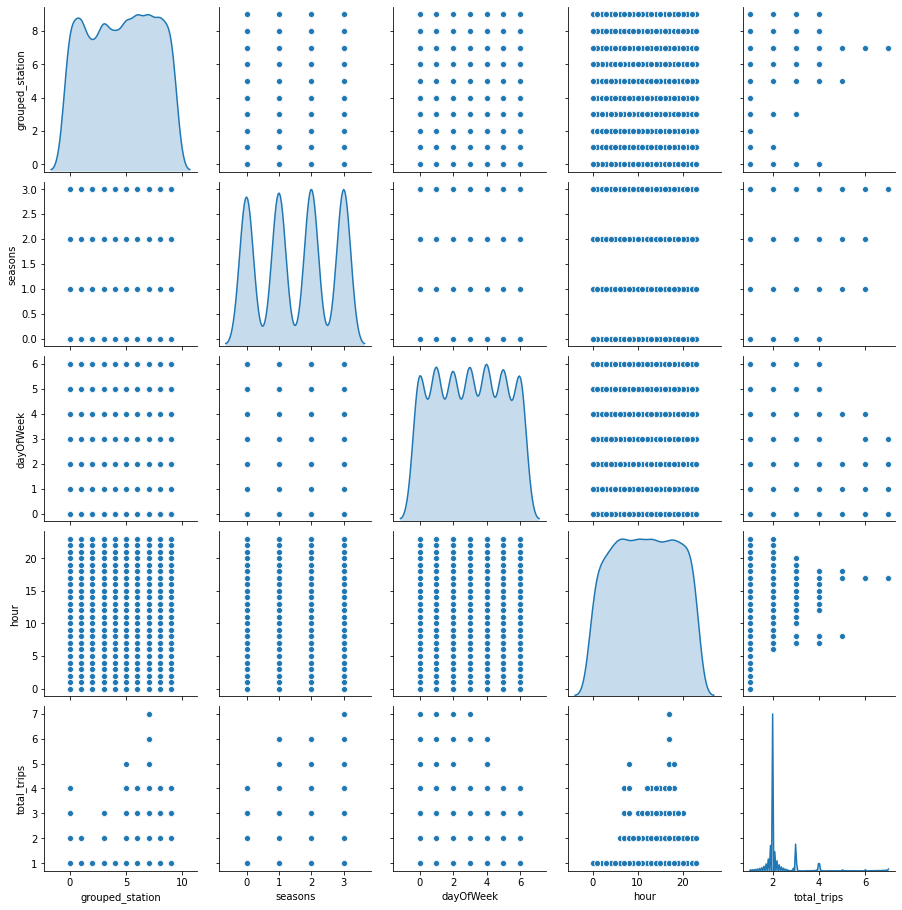

In [11]:
sns.pairplot(train_dataset_10[["grouped_station","seasons", "dayOfWeek", "hour", "total_trips"]], diag_kind="kde")

In [0]:
# data with 10 clusters
train_stats_10 = train_dataset_10.describe()
train_stats_10.pop("total_trips")
train_stats_10 = train_stats_10.transpose()

train_labels_10 = train_dataset_10.pop('total_trips')
test_labels_10 = test_dataset_10.pop('total_trips')


In [45]:
# model for data with 10 clusters 
def build_model_10():
  model1 = Sequential()
  l = len(train_dataset_10.keys())
  model1.add(Dense(64, activation='relu', input_shape=[l]))
  model1.add(Dense(32, activation='relu'))
  model1.add(Dense(8, activation='relu'))
  model1.add(Dense(1)) 
  

  optimizer = tf.keras.optimizers.RMSprop(0.01)

  model1.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model1


model1 = build_model_10()

print(model1.summary())



Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_46 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_47 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 9         
Total params: 2,673
Trainable params: 2,673
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
model1 = build_model_10()
EPOCHS=1000
# The patience parameter is the amount of epochs to check for improvement
early_stop_10 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

early_history_10 = model1.fit(train_dataset_10, train_labels_10, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop_10, tfdocs.modeling.EpochDots()])
hist_10 = pd.DataFrame(early_history_10.history)
hist_10['epoch'] = early_history_10.epoch
hist_10.tail()


Epoch: 0, loss:0.4977,  mae:0.4665,  mse:0.4977,  val_loss:0.4006,  val_mae:0.3884,  val_mse:0.4006,  
...................................................................................

,val_loss,val_mae,val_mse,loss,mae,mse,epoch
78,0.418375,0.399006,0.418375,0.325138,0.347843,0.325138,78
79,0.309874,0.340684,0.309874,0.308927,0.344827,0.308927,79
80,0.195200,0.276376,0.195200,0.231347,0.308877,0.231347,80
81,0.190212,0.275029,0.190212,0.187133,0.278860,0.187134,81
82,0.210888,0.310149,0.210888,0.176894,0.267596,0.176894,82


In [0]:
test_predictions_10 = model1.predict(test_dataset_10).flatten()

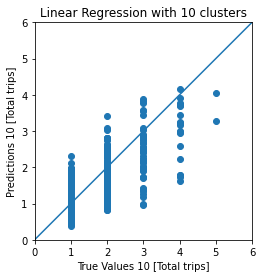

In [51]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels_10, test_predictions_10)
plt.xlabel('True Values 10 [Total trips]')
plt.ylabel('Predictions 10 [Total trips]')
plt.title('Linear Regression with 10 clusters')
lims = [0, 6]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [66]:
example_batch_10 = test_dataset_10.tail(25)
example_result_10 = model1.predict(example_batch_10)
print(example_result_10)

[[0.85520303]
 [0.85175943]
 [1.4619331 ]
 [1.0518937 ]
 [1.0752326 ]
 [1.4477078 ]
 [1.0614135 ]
 [0.8225237 ]
 [2.0317478 ]
 [0.8302442 ]
 [1.7248812 ]
 [1.2968649 ]
 [1.5866257 ]
 [1.2296296 ]
 [2.767998  ]
 [1.9752406 ]
 [1.5896436 ]
 [1.6558948 ]
 [1.7256266 ]
 [2.1779735 ]
 [2.2737641 ]
 [0.7707418 ]
 [0.77417886]
 [1.9752406 ]
 [1.6530373 ]]


In [0]:
train_dataset_20 = clustered_20.sample(frac=0.8,random_state=0)
test_dataset_20 = clustered_20.drop(train_dataset_20.index)

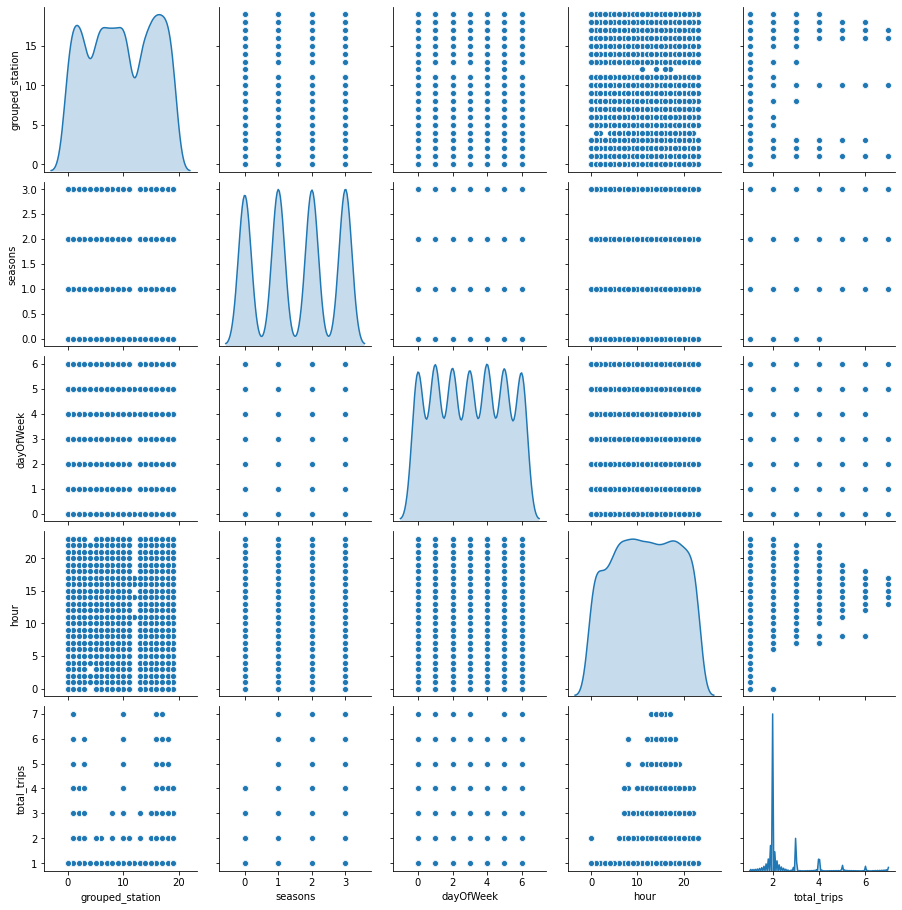

In [54]:
sns.pairplot(train_dataset_20[["grouped_station", "seasons", "dayOfWeek", "hour", "total_trips"]], diag_kind="kde")

In [57]:
# clustered data modelling
train_stats_20 = train_dataset_20.describe()
train_stats_20.pop("total_trips")
train_stats_20 = train_stats_20.transpose()

train_labels_20 = train_dataset_20.pop('total_trips')
test_labels_20 = test_dataset_20.pop('total_trips')


def norm(x):
  return (x - train_stats_20['mean']) / train_stats_20['std']
normed_train_data_20 = norm(train_dataset_20)
normed_test_data_20 = norm(test_dataset_20)

print(normed_train_data_20)

       grouped_station   seasons  dayOfWeek      hour
2524         -1.117421  1.332804   0.504866 -0.849223
8998          0.904079  1.332804  -1.000343 -0.997630
8290          0.735620  0.435923   0.504866  1.228479
1091         -1.454338  0.435923   1.006603  0.634850
11323         1.577912 -0.460958  -1.502079 -1.146037
...                ...       ...        ...       ...
968          -1.454338  0.435923  -1.502079  0.189628
7866          0.567162  1.332804   0.003130 -0.552408
6457          0.061787  1.332804  -1.502079  1.228479
1355         -1.285880 -1.357839  -0.498606  1.525293
5520         -0.106671 -0.460958  -1.000343  0.041221

[9458 rows x 4 columns]


In [58]:
# clustered model
def build_model_20():
  model2 = Sequential()
  l = len(train_dataset_20.keys())
  model2.add(Dense(64, activation='relu', input_shape=[l]))
  model2.add(Dense(16, activation='relu'))
  model2.add(Dense(8, activation='relu'))
  model2.add(Dense(1)) 

  optimizer = tf.keras.optimizers.RMSprop(0.1)

  model2.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model2


model2 = build_model_20()

print(model2.summary())




Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_74 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_75 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 9         
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________
None


In [75]:
model2 = build_model_20()
EPOCHS=1000
# The patience parameter is the amount of epochs to check for improvement
early_stop_20 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

early_history_20 = model2.fit(normed_train_data_20, train_labels_20, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop_20, tfdocs.modeling.EpochDots()])
hist_20 = pd.DataFrame(early_history_20.history)
hist_20['epoch'] = early_history_20.epoch
hist_20.tail()


Epoch: 0, loss:0.9289,  mae:0.5944,  mse:0.9289,  val_loss:0.5802,  val_mae:0.4407,  val_mse:0.5802,  
......................................................................................

,val_loss,val_mae,val_mse,loss,mae,mse,epoch
81,0.574567,0.547987,0.574567,0.689632,0.547424,0.689632,81
82,0.583630,0.431646,0.583631,0.693054,0.551070,0.693054,82
83,0.579378,0.564281,0.579378,0.691687,0.549005,0.691687,83
84,0.570217,0.524114,0.570216,0.689172,0.549977,0.689172,84
85,0.575218,0.550525,0.575218,0.689404,0.549691,0.689404,85


In [0]:
test_predictions_20 = model2.predict(normed_test_data_20).flatten()

Text(0.5, 1.0, 'Linear Regression with 20 clusters')

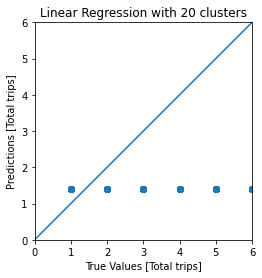

In [77]:
b = plt.axes(aspect='equal')
plt.scatter(test_labels_20, test_predictions_20)
plt.xlabel('True Values [Total trips]')
plt.ylabel('Predictions [Total trips]')
lims = [0, 6]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.title('Linear Regression with 20 clusters')

In [78]:
example_batch_20 = test_dataset_20[:10]
example_result_20 = model2.predict(example_batch_20)
print(example_result_20)

[[1.3941438]
 [1.3941438]
 [1.3941438]
 [1.3941438]
 [1.3941438]
 [1.3941438]
 [1.3941438]
 [1.3941438]
 [1.3941438]
 [1.3941438]]
